In [1]:
import zipfile

In [3]:
# ! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-03-22 10:37:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 172.253.115.128, 172.217.15.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   814KB/s    in 2m 27s  

2022-03-22 10:39:40 (726 KB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [4]:
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

In [6]:
import os

for dirpath, dirnames, filenames in os.walk('./datasets/pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in './datasets/pizza_steak'.
There are 2 directories and 0 images in './datasets/pizza_steak/test'.
There are 0 directories and 250 images in './datasets/pizza_steak/test/steak'.
There are 0 directories and 250 images in './datasets/pizza_steak/test/pizza'.
There are 2 directories and 0 images in './datasets/pizza_steak/train'.
There are 0 directories and 750 images in './datasets/pizza_steak/train/steak'.
There are 0 directories and 750 images in './datasets/pizza_steak/train/pizza'.


In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path('./datasets/pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  
  target_folder = target_dir + '/' + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


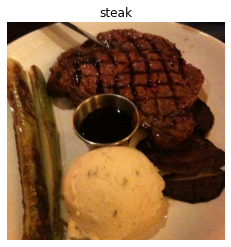

In [15]:
img = view_random_image(target_dir='./datasets/pizza_steak/train', target_class='steak')

In [16]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 25,  15,  13],
        [ 20,  10,   8],
        [ 15,   5,   3],
        ...,
        [  8,   7,   3],
        [  7,   6,   2],
        [ 14,  13,   9]],

       [[ 21,  12,   7],
        [ 18,   9,   4],
        [ 15,   6,   1],
        ...,
        [ 13,  12,   8],
        [  7,   6,   2],
        [ 10,   9,   5]],

       [[ 18,   9,   4],
        [ 19,  10,   5],
        [ 17,   8,   3],
        ...,
        [ 16,  15,  11],
        [  8,   7,   3],
        [ 10,   9,   5]],

       ...,

       [[215, 155, 103],
        [214, 154, 102],
        [209, 149,  95],
        ...,
        [204, 133,  87],
        [207, 136,  92],
        [204, 133,  89]],

       [[203, 143,  93],
        [213, 153, 103],
        [207, 147,  95],
        ...,
        [210, 139,  93],
        [217, 146, 100],
        [205, 134,  88]],

       [[213, 152, 105],
        [207, 147,  97],
        [207, 147,  97],
        ...,
        [208, 137,  9

In [17]:
img.shape

(512, 512, 3)

In [18]:
img/255

array([[[0.09803922, 0.05882353, 0.05098039],
        [0.07843137, 0.03921569, 0.03137255],
        [0.05882353, 0.01960784, 0.01176471],
        ...,
        [0.03137255, 0.02745098, 0.01176471],
        [0.02745098, 0.02352941, 0.00784314],
        [0.05490196, 0.05098039, 0.03529412]],

       [[0.08235294, 0.04705882, 0.02745098],
        [0.07058824, 0.03529412, 0.01568627],
        [0.05882353, 0.02352941, 0.00392157],
        ...,
        [0.05098039, 0.04705882, 0.03137255],
        [0.02745098, 0.02352941, 0.00784314],
        [0.03921569, 0.03529412, 0.01960784]],

       [[0.07058824, 0.03529412, 0.01568627],
        [0.0745098 , 0.03921569, 0.01960784],
        [0.06666667, 0.03137255, 0.01176471],
        ...,
        [0.0627451 , 0.05882353, 0.04313725],
        [0.03137255, 0.02745098, 0.01176471],
        [0.03921569, 0.03529412, 0.01960784]],

       ...,

       [[0.84313725, 0.60784314, 0.40392157],
        [0.83921569, 0.60392157, 0.4       ],
        [0.81960784, 0

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
tf.random.set_seed(42)

train_data_gen = ImageDataGenerator(rescale=1./255)
valid_data_gen = ImageDataGenerator(rescale=1./255)

train_dir = './datasets/pizza_steak/train'
test_dir = './datasets/pizza_steak/test'

In [25]:
train_data = train_data_gen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)

valid_data = valid_data_gen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
model_1 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 32s 671ms/step - loss: 0.5666 - accuracy: 0.7100 - val_loss: 0.3961 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 33s 695ms/step - loss: 0.4164 - accuracy: 0.8253 - val_loss: 0.3510 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 32s 678ms/step - loss: 0.3977 - accuracy: 0.8220 - val_loss: 0.3223 - val_accuracy: 0.8860
Epoch 4/5
47/47 [==============================] - 33s 697ms/step - loss: 0.3405 - accuracy: 0.8700 - val_loss: 0.3271 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 32s 678ms/step - loss: 0.3130 - accuracy: 0.8807 - val_loss: 0.3595 - val_accuracy: 0.8340


In [28]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            

In [31]:
print(tf.__version__)

2.6.0


In [ ]:
model_1 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))